In [47]:
import math
from pykrige import OrdinaryKriging
from pykrige.uk import UniversalKriging
import numpy as np
import matplotlib.pyplot as plt

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autots import AutoTS
import pathlib


In [3]:
well_data = pd.read_excel('../data/Data-Wells.xlsx')

filtered = well_data.iloc[:, lambda df: df.columns.str.contains('Well Name|Aquifer|LONG|LAT|Genl Bot Scr Elev',
                                              case=False)].copy()
dedup = filtered.drop_duplicates()
dedup

,Well Name,Aquifer,AQUIFER2,LONG,LAT,Genl Bot Scr Elev
0,1021 Westview Way,Not Determined,other,0.000000,0.000000,NaN
1,1024 Westview Way,Not Determined,other,0.000000,0.000000,NaN
2,1049 Westview Way,Not Determined,other,0.000000,0.000000,NaN
3,105 Myrtle,D0,D0,-83.827509,42.285461,817.0
14,1052 Westview Way,Not Determined,other,0.000000,0.000000,NaN
...,...,...,...,...,...,...
34125,TW-9,D2,D2,-83.806538,42.280146,810.0
34353,Varsity Ford,D2,D2,-83.798543,42.285901,NaN
34359,Weber's Drain 1st Sister Lake,Not Applicable,other,0.000000,0.000000,NaN
34362,Weber's Heat Pump Drain,Not Applicable,other,0.000000,0.000000,NaN


In [4]:
cache_dir = pathlib.Path('../cache/')

def get_data(well_name):
    well_name_dir = cache_dir.joinpath(well_name)
    if not well_name_dir.exists(): return None
    ori = pd.read_csv(well_name_dir.joinpath('data.csv'), parse_dates= ['Date'], index_col = 0, squeeze = True)
    predict = pd.read_csv(well_name_dir.joinpath('predict.csv'), parse_dates= ['Date'],index_col = 0, squeeze = True)
    return ori, predict

In [48]:
lon = []
lat = []
z = []
for index, row in dedup.iterrows():
    name = row[0]
    long_ = pd.to_numeric(row[3], errors='coerce')
    lat_ = pd.to_numeric(row[4], errors='coerce')
    data = get_data(name)
    if data is not None and len(data[1]) > 0 and long_ != 0 and lat_ != 0\
            and not math.isnan(data[1].iloc[0]):
        lon.append(long_)
        lat.append(lat_)
        print(name)
        print(data[1].iloc[0])
        # print( type(data[1]))
        z.append(data[1].iloc[0])

110 Parkland Plaza
1.2337480677414805
170 Aprill
3.545763540871451
175 Jackson Plaza
811.0975583293447
2575 Valley
93.5
2643 Dexter Rd
2.645092656396077
2652 Dexter Rd
9.447227278849118
2700 Dexter Rd
1928.6062791172728
2805 Dexter Rd
1322.8404842946434
2819 Dexter Rd
184.1271934959181
305 Pinewood
2.610015339532719
3245 Kingwood
3.046021797321135
333 Jackson Plaza
16.954249763180226
3365 Jackson Rd
136.58446198243627
350 Rose
65.29759584958838
354 Pinewood
3
373 Pinewood Shallow
213.6383253737956
4141 Jackson Rd
2.4551431661821086
420 Parkwood
33.041380381851404
430 Barber East
26.35
430 Barber West
77.42644247602799
435 Barber
0.0
440 Clarendon
10683.844624572082
4401 Park West
6.28327108098983
441 Parkwood
10.450184790485713
453 Dupont
3.543519418501627
456 Clarendon
590.0
4601 Park 4 inch
2.0
4601 Park 6 inch
0.6930830733096336
465 Dupont
826.5928167166884
4742 Park Rd
2.413117023891527
476 Barber
5.55466468990176
5005 Jackson Rd
14.647058823529411
544 Allison
4.66332192559995
545 

In [49]:
print(np.array(lon))
print(np.array(lat))
print(np.array(z))

N = 7
lon__ = 360.0 * np.random.random(N)
print(lon__)

[-83.81430215 -83.80809408 -83.80144085 -83.7827466  -83.78419432
 -83.78423308 -83.78564077 -83.7868994  -83.78737733 -83.79013211
 -83.79386229 -83.80205398 -83.79620075 -83.793637   -83.78959876
 -83.79011642 -83.81324574 -83.7909244  -83.79191766 -83.79191766
 -83.79234347 -83.78556382 -83.81737601 -83.79126888 -83.7933565
 -83.78585485 -83.82088844 -83.82088844 -83.79301325 -83.82307019
 -83.79170976 -83.82592569 -83.78329263 -83.78355021 -83.78327333
 -83.78324968 -83.78358241 -83.78368869 -83.8170817  -83.78373278
 -83.78378369 -83.78358914 -83.80315351 -83.82405783 -83.82372149
 -83.82355409 -83.7986402  -83.78956189 -83.78730445 -83.78738603
 -83.78716053 -83.78711    -83.8017822  -83.8017822  -83.78992924
 -83.78075954 -83.7709439  -83.77096492 -83.77634686 -83.79911868
 -83.79914051 -83.79852313 -83.79849552 -83.78338119 -83.79311071
 -83.79311248 -83.80336812 -83.80343813 -83.7791656  -83.78692035
 -83.7799073  -83.77985784 -83.78508551 -83.78267321 -83.80663706
 -83.806655

In [53]:
# Create ordinary kriging object:
OK = OrdinaryKriging(
    np.array(lon),
    np.array(lat),
    np.array(z),
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)


grid_lon = np.linspace(np.min(lon), np.max(lon), 230)
grid_lat = np.linspace(np.min(lat), np.max(lat), 230)
# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)


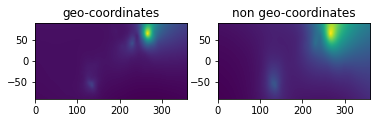

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

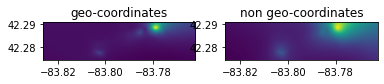

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()